# Bank Customer Churn - Deep Learning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

from sklearn.metrics import roc_curve, auc
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
%pip install opendatasets
import opendatasets as od

#Fetching data from kaggle
dataset_url = 'https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset'

od.download(dataset_url)

Skipping, found downloaded files in "./bank-customer-churn-dataset" (use force=True to force download)


In [ ]:
#Load the dataset
data = pd.read_csv('bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')

# Data Preprocessing

In [ ]:
data.drop(['customer_id'], axis=1, inplace=True)

In [ ]:
data = pd.get_dummies(data=data,columns=['country','gender'],drop_first=True)

In [ ]:
cols_to_scale = ['credit_score','balance','estimated_salary']

scaler = MinMaxScaler()

data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [ ]:
data[cols_to_scale] = data[cols_to_scale].round(2)

In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infs with NaN
data[cols_to_scale] = data[cols_to_scale].fillna(data[cols_to_scale].mean()) #Fill NaN with mean of column

In [ ]:
data['country_Germany'] = data['country_Germany'].map({False:0,True:1})
data['country_Spain'] = data['country_Spain'].map({False:0,True:1})
data['gender_Male'] = data['gender_Male'].map({False:0,True:1})

In [ ]:
X = data.drop('churn',axis=1)
y = data['churn']

In [ ]:
smote = SMOTE(sampling_strategy='auto')

X_resample,y_resample = smote.fit_resample(X,y)

In [ ]:
y_resample.value_counts()

,count
churn,
1,7963
0,7963


# Splitting data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.2,random_state=1)

In [ ]:
print(X_train.shape, y_test.shape)

(12740, 11) (3186,)


# Model training


In [ ]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=X_train.shape[1]))
model.add(Dropout(0.1))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5288 - loss: 2.1616 - val_accuracy: 0.6644 - val_loss: 0.6180
Epoch 2/200
319/319 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6084 - loss: 0.7070 - val_accuracy: 0.7013 - val_loss: 0.5824
Epoch 3/200
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6732 - loss: 0.6146 - val_accuracy: 0.7182 - val_loss: 0.5559
Epoch 4/200
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6924 - loss: 0.5814 - val_accuracy: 0.7253 - val_loss: 0.5479
Epoch 5/200
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6996 - loss: 0.5699 - val_accuracy: 0.7280 - val_loss: 0.5407
Epoch 6/200
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7175 - loss: 0.5595 - val_accuracy: 0.7276 - val_loss: 0.5436
Epoch 7/200
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7136 - loss: 0.5628 - val_accuracy: 0.7394 - val_loss: 0.5429
Epoch 8/200
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7176 - loss: 0.5557 - val_ac

# Model Evaluation

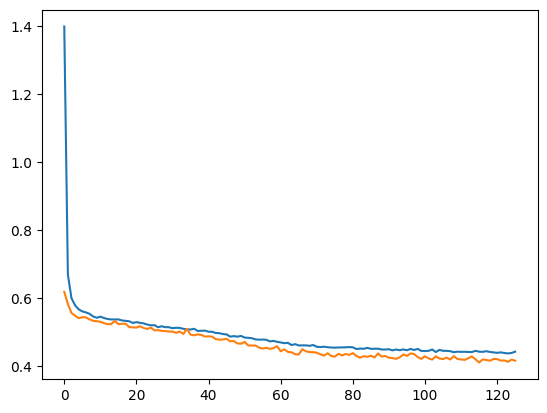

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

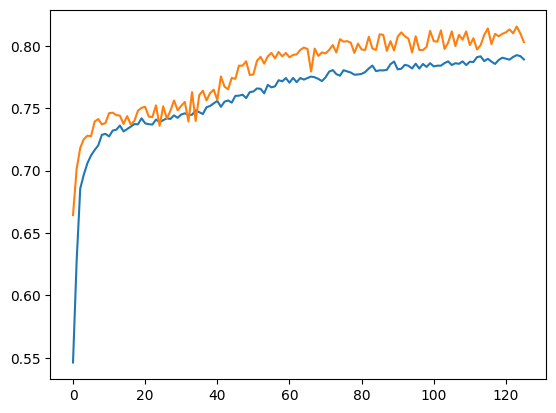

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      1534
           1       0.83      0.78      0.81      1652

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.81      0.80      0.80      3186



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)
print(f"AUC: {auc_score}")

AUC: 0.8049217731421121


### The model predicting customer churn achieves an accuracy of 80%, with balanced precision and recall for both churners and non-churners. It has an F1-score of 0.80 for non-churners and 0.81 for churners, and an AUC of 0.80, indicating good overall performance in distinguishing between the two classes.

In [26]:
model.save('churn.keras')

In [1]:
#from google.colab import files
#files.download('churn.keras')
# from keras.models import load_model
# loaded_model = load_model('churn.keras')